# Extending `pandas` to other ecosystems

In [10]:
    import pandas

# [Scikit-learn](http://scikit-learn.org/)

In [75]:
    import sklearn.datasets, sklearn.discriminant_analysis, sklearn.model_selection, sklearn.metrics, sklearn.tree
    from toolz.curried import *; from toolz.curried.operator import *

Let's use the iris example.  _I'm sorry 😳._

In [76]:
    iris = sklearn.datasets.load_iris()

Create a tidy dataframe with testing and training indexes.

In [77]:
    df = pandas.DataFrame(
        iris['data'],
        pandas.CategoricalIndex(
            pandas.Index(iris['target']).map(
                iris['target_names'].__getitem__
            ), iris['target_names'], name='targets'),
        iris['feature_names']
    ).pipe(
        lambda df: pandas.concat(dict(zip(('train', 'test'), sklearn.model_selection.train_test_split(df))))
    )
    df.sample(2)

sepal length (cm)  sepal width (cm)  petal length (cm)  \
      targets                                                             
train virginica                7.1               3.0                5.9   
      setosa                   4.4               3.0                1.3   

                 petal width (cm)  
      targets                      
train virginica               2.1  
      setosa                  0.2

Let's initialize some models.

In [78]:
    tree = sklearn.tree.DecisionTreeClassifier()
    lda = sklearn.discriminant_analysis.LinearDiscriminantAnalysis()

Train and predict the classes.

In [79]:
    df = df.pipe(
        do(lambda df: lda.fit(df.loc['train'], df.loc['train'].index))
    ).pipe(
        do(lambda df: tree.fit(df.loc['train'], df.loc['train'].index))
    ).pipe(
        lambda df: df
        .set_index(pandas.Index(tree.predict(df), name=tree), append=True)
        .set_index(pandas.Index(lda.predict(df), name=lda), append=True)
    )

In [80]:
    import IPython

In [81]:
    for model in (tree, lda):
        print(model)
        df.loc['test'].index.to_frame().pipe(
            lambda df: pandas.DataFrame(
                sklearn.metrics.confusion_matrix(df['targets'], df[model]),
                iris['target_names'], iris['target_names']
            )
        ).pipe(IPython.display.display)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


,setosa,versicolor,virginica
setosa,13,0,0
versicolor,0,12,0
virginica,0,1,12


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)


,setosa,versicolor,virginica
setosa,13,0,0
versicolor,0,12,0
virginica,0,0,13


# IPywidgets

Using ipwidgets to make your code interactive.

In [82]:
    from ipywidgets import interact

In [19]:
    @interact
    def _(model=['tree','lda'], type=['test', 'train']):
        model = globals().get(model)
        df.loc[type].index.to_frame().pipe(
            lambda df: pandas.DataFrame(
                sklearn.metrics.confusion_matrix(df['targets'], df[model]),
                iris['target_names'], iris['target_names']
            )
        ).pipe(IPython.display.display)

interactive(children=(Dropdown(description='model', options=('tree', 'lda'), value='tree'), Dropdown(descripti…

In [83]:
    IPython.display.IFrame("https://qgrid.readthedocs.io/en/latest/", "100%", 500)

# [Pandas Plotting](http://pandas.pydata.org/pandas-docs/stable/visualization.html)

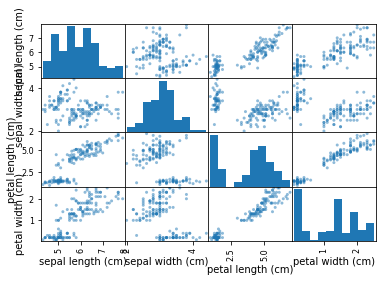

In [61]:
    df.pipe(pandas.plotting.scatter_matrix); 

# [Seaborn](https://seaborn.pydata.org/examples/index.html) for statistical data visualization.

In [63]:
    import seaborn as sns

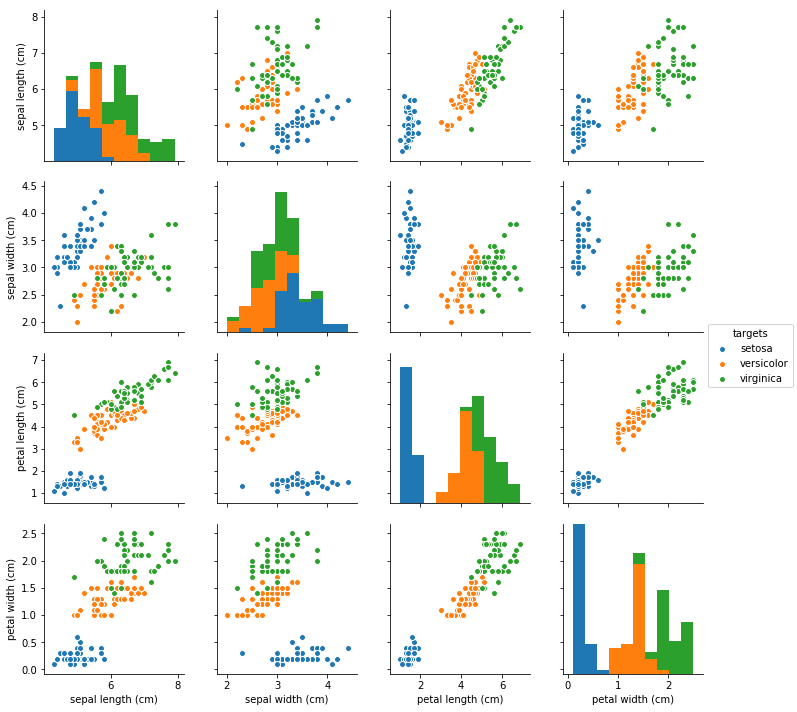

In [68]:
    df.reset_index(level=1).pipe(sns.pairplot, hue='targets');

# Making connected graphs with networkx

In [44]:
    import networkx, scipy.spatial.distance

In [21]:
    random_data = pandas.concat([pandas.util.testing.makeDataFrame() for _ in range(10)])

In [42]:
    D = pandas.DataFrame(
        scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(random_data)),
        random_data.index.rename('source'), random_data.index.rename('target')
    )

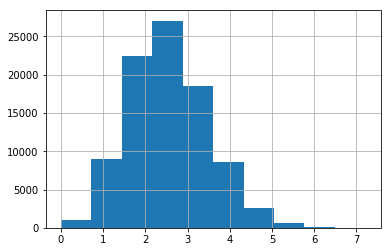

In [43]:
    D.stack().hist()

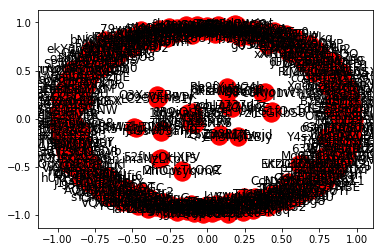

In [45]:
    G = networkx.from_pandas_adjacency(
        D<.4
    )
    networkx.draw_networkx(G)

In [46]:
    pandas.Series(dir(networkx)).pipe(lambda s: s[s.str.startswith('draw')]).to_frame().T

,255,256,257,258,259,260,261,262,263,264,265,266,267
0,draw,draw_circular,draw_kamada_kawai,draw_networkx,draw_networkx_edge_labels,draw_networkx_edges,draw_networkx_labels,draw_networkx_nodes,draw_random,draw_shell,draw_spectral,draw_spring,drawing


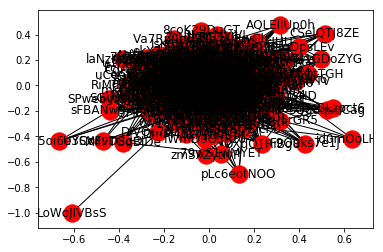

In [55]:
    networkx.draw_networkx(
        D.multiply(D<2).stack().pipe(lambda s: s[s!=0]).to_frame('distance').reset_index().pipe(
            networkx.from_pandas_edgelist
        ))

# [Ibis Productivity Framework](https://github.com/ibis-project/ibis/)

In [72]:
    import ibis
    db = ibis.sqlite.connect('idiomatic_pandas.sqlite')
    db.list_tables()
    db.table('urls')['value'].execute()
    db.table('responses')['key'].execute()        

0    1e796e69aee7d5caaa8302de99522689d773d858bdc425...
1    ac00bfb030a3bb94b6bcb6b4e57cc7025d644a6673d15c...
2    f69c4ed7f42635e24d8b0d6e7cf4e15bd2edd8dc46c647...
Name: key, dtype: object

In [73]:
    IPython.display.IFrame('https://dask.org/', '100%', 500)